<Axes: >

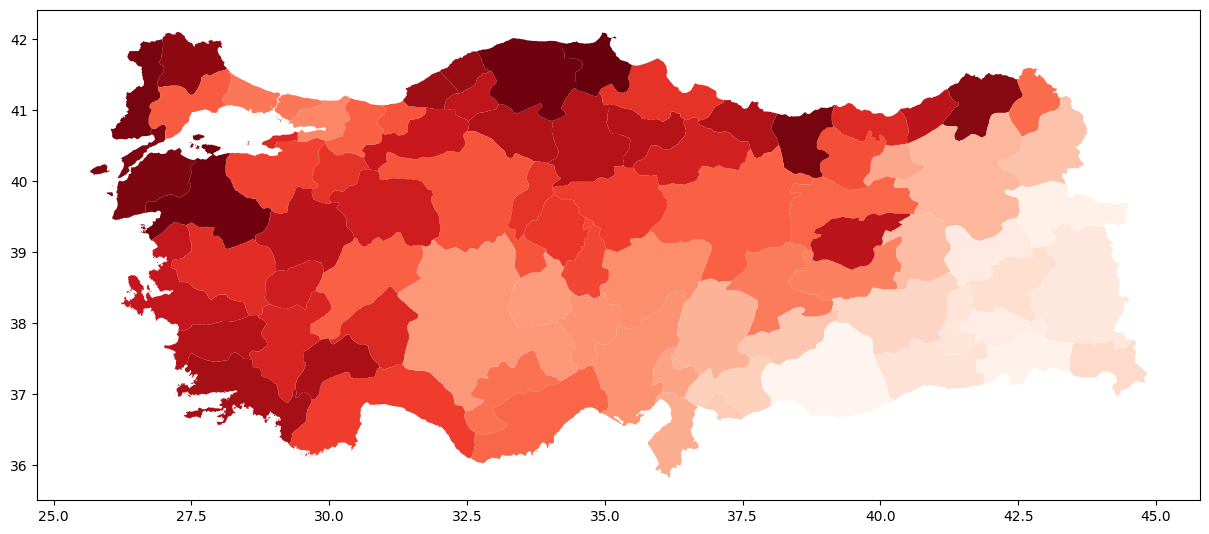

In [28]:
import pandas as pd
import geopandas as gp
import adjustText as aT

country_data = gp.read_file(r"C:\Users\erdem\OneDrive\Masaüstü\country_data\countries.geojson")
turkey = country_data[country_data['ADMIN'] == 'Turkey']

turkey_provinces_1 = gp.read_file(r"C:\Users\erdem\OneDrive\Masaüstü\country_data\TUR_adm0.shp")
turkey_provinces_2 = gp.read_file(r"C:\Users\erdem\OneDrive\Masaüstü\country_data\TUR_adm1.shp")
turkey_provinces_3 = gp.read_file(r"C:\Users\erdem\OneDrive\Masaüstü\country_data\TUR_adm2.shp")

turkey_provinces_2.rename(columns = {'NAME_1':'provinces'}, inplace = True)

yas = pd.read_csv(r"C:\Users\erdem\OneDrive\Masaüstü\country_data\yas.csv", encoding = 'latin-1', sep = ';')
yas.rename(columns = {"Il":"provinces"}, inplace = True)

turkey_provinces_2.replace("K. Maras","Kahramanmaras",inplace=True)
turkey_provinces_2.replace('Gümüshane', 'Gumushane',inplace=True)
turkey_provinces_2.replace('Kinkkale', 'Kirikkale',inplace=True)
turkey_provinces_2.replace('Zinguldak', 'Zonguldak',inplace=True)
turkey_provinces_2.replace('Afyon', 'Afyonkarahisar',inplace=True)
turkey_provinces_2.replace('Kütahya', 'Kutahya',inplace=True)
turkey_provinces_2.replace('Elazığ','Elazig',inplace = True)
turkey_provinces_2.replace('Bingöl','Bingol',inplace = True)
turkey_provinces_2.replace('Bartın','Bartin',inplace = True)
turkey_provinces_2.replace('Karabük','Karabuk',inplace=True)
turkey_provinces_2.replace('Düzce','Duzce',inplace = True)

map_data = turkey_provinces_2.merge(yas, on = "provinces")

map_data.plot(column="Yas",cmap="Reds",figsize=(15,18))

map_data_points = map_data.copy()
map_data_points["center"] = map_data_points["geometry"].centroid
map_data_points.set_geometry("center", inplace = True)

ax = map_data.plot(figsize = (20, 12), column = "Yas",cmap="Reds")
texts = []

for x, y, label in zip(map_data_points.center.x, map_data_points.center.y, map_data_points["İl"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=5, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

ax.set_title("Türkiye'de İllere Göre Ortanca Yaş Dağılımı", size = 20)
ax.set_axis_off()